<a href="https://colab.research.google.com/github/chaitalisaha06/CSI_Assignments/blob/main/Loan_Approval_Prediction_Data_Preprocessing_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
df=pd.read_csv("/content/drive/MyDrive/Training Dataset_loanApproval.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


The dataset consists of 614 entries and 13 columns, with a mix of categorical and numerical data. Here is a summary of the key aspects:

Dataset Columns:

1. Loan_ID: Identifier for the loan (categorical).

2. Gender: Gender of the applicant (categorical, with missing values).

3. Married: Marital status (categorical, with missing values).

4. Dependents: Number of dependents (categorical, with missing values).

5. Education: Education level (categorical).

6. Self_Employed: Self-employment status (categorical, with missing values).

7. ApplicantIncome: Applicant's income (numerical).

8. CoapplicantIncome: Coapplicant's income (numerical).

9. LoanAmount: Loan amount (numerical, with missing values).

10. Loan_Amount_Term: Loan amount term (numerical, with missing values).

11. Credit_History: Credit history (numerical, with missing values).

12. Property_Area: Property area type (categorical).

13. Loan_Status: Loan approval status (categorical, target variable).











In [107]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [108]:
for i in range(len(df.columns)):
  print(f'{df.columns[i]} : {len(df[df.columns[i]].value_counts())}')

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


## Handling Missing Values

In [109]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

In [110]:
# Fill missing categorical values with the mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [111]:
# Fill missing numerical values with the median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [112]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values

Series([], dtype: int64)

## Encoding categorical variables

In [113]:
#  FOR BINARY CATEGORICAL VALUES (2 option values) -> LABEL ENCODING

label_encoders = {}
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Status']:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    label_encoders[column] = encoder

In [114]:
#  FOR NON-BINARY -> ONE HOT ENCODING
df = pd.get_dummies(df, columns=['Dependents', 'Property_Area'])

In [115]:
df.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,True,False,False,False,False,False,True
1,LP001003,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,False,True,False,False,True,False,False
2,LP001005,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,True,False,False,False,False,False,True
3,LP001006,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,True,False,False,False,False,False,True
4,LP001008,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,True,False,False,False,False,False,True


## Feature Engineering

In [116]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [117]:
df['Income_to_Loan_Ratio'] = df['Total_Income'] / df['LoanAmount']

In [118]:
df['Loan_Amount_per_Term'] = df['LoanAmount'] / df['Loan_Amount_Term']

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  614 non-null    object 
 1   Gender                   614 non-null    int64  
 2   Married                  614 non-null    int64  
 3   Education                614 non-null    int64  
 4   Self_Employed            614 non-null    int64  
 5   ApplicantIncome          614 non-null    int64  
 6   CoapplicantIncome        614 non-null    float64
 7   LoanAmount               614 non-null    float64
 8   Loan_Amount_Term         614 non-null    float64
 9   Credit_History           614 non-null    float64
 10  Loan_Status              614 non-null    int64  
 11  Dependents_0             614 non-null    bool   
 12  Dependents_1             614 non-null    bool   
 13  Dependents_2             614 non-null    bool   
 14  Dependents_3+            6

In [120]:
df=df.drop(["Loan_ID"],axis=1)

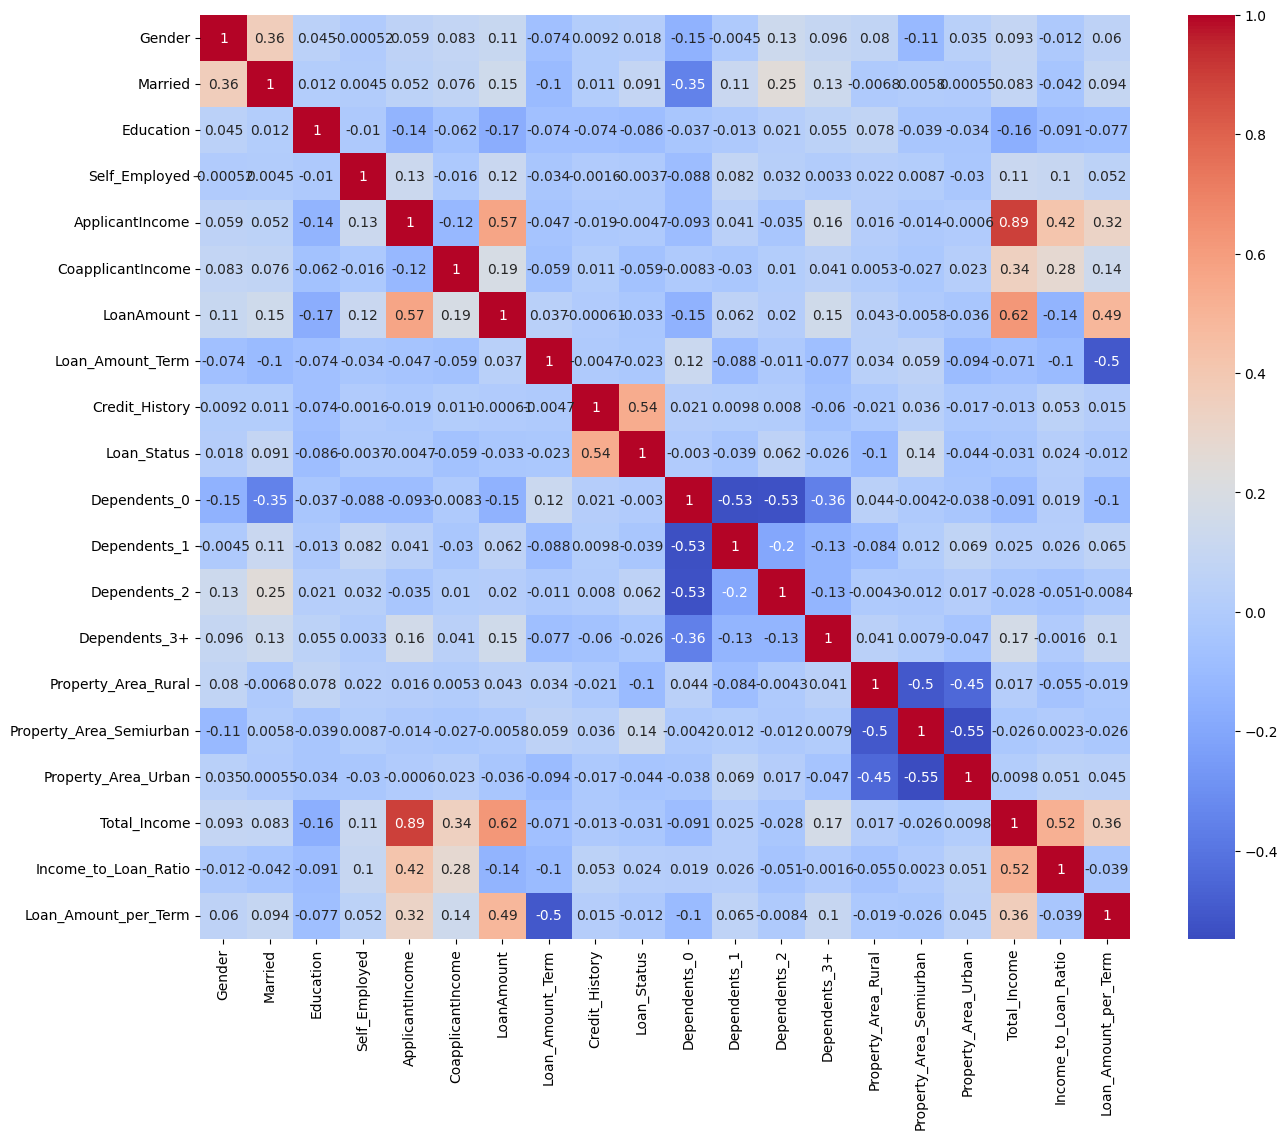

In [121]:
plt.figure(figsize=(15, 12))

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [122]:
#correlation with the target variable
corr = df.corr()
corr["Loan_Status"].sort_values(ascending=False)

Loan_Status                1.000000
Credit_History             0.540556
Property_Area_Semiurban    0.136540
Married                    0.091478
Dependents_2               0.062384
Income_to_Loan_Ratio       0.023870
Gender                     0.017987
Dependents_0              -0.003044
Self_Employed             -0.003700
ApplicantIncome           -0.004710
Loan_Amount_per_Term      -0.011757
Loan_Amount_Term          -0.022549
Dependents_3+             -0.026123
Total_Income              -0.031271
LoanAmount                -0.033214
Dependents_1              -0.038740
Property_Area_Urban       -0.043621
CoapplicantIncome         -0.059187
Education                 -0.085884
Property_Area_Rural       -0.100694
Name: Loan_Status, dtype: float64

## Feature scaling for the model

In [123]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Columns to be scaled
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Fit and transform the scaler on the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the processed data
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Income_to_Loan_Ratio,Loan_Amount_per_Term
0,1,0,0,0,0.072991,-0.554487,-0.211241,0.273231,0.411733,1,True,False,False,False,False,False,True,5849.0,45.695312,0.355556
1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,0.411733,0,False,True,False,False,True,False,False,6091.0,47.585938,0.355556
2,1,1,0,1,-0.393747,-0.554487,-0.948996,0.273231,0.411733,1,True,False,False,False,False,False,True,3000.0,45.454545,0.183333
3,1,1,1,0,-0.462062,0.251980,-0.306435,0.273231,0.411733,1,True,False,False,False,False,False,True,4941.0,41.175000,0.333333
4,1,0,0,0,0.097728,-0.554487,-0.056551,0.273231,0.411733,1,True,False,False,False,False,False,True,6000.0,42.553191,0.391667


In [124]:
X=df.drop(columns=['Loan_Status'])
Y=df['Loan_Status']

In [125]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)